Import all necessary libraries - numpy, pandas, matplotlib.pyplot, train_test_split, KNeighborsClassifier, LabelEncoder

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

So, you're given dataset of diabet evaluations. Your task is to

a) Use the columns of Glucose and BMI as features and of Outcome as target

b) Convert string values to numerical types in target column. (Remember, your model can only work with numerical data)

c) Divide feature and target dataset into train and test parts

d) Train the new model and find the optimal K values based on performance

e) Plot the graph of test accuracy scores versus K values

Note: You might have accuracy within 70-80%. Put your comments for further improvements 

In [2]:
df = pd.read_csv('../data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,0,33.6,0.627,50,Positive
1,1,85.0,66,29,0,26.6,0.351,31,Negative
2,8,183.0,64,0,0,23.3,0.672,32,Positive
3,1,89.0,66,23,94,28.1,0.167,21,Negative
4,0,137.0,40,35,168,43.1,2.288,33,Positive


In [3]:
train, target = df[['Glucose', 'BMI']], df['Outcome']

In [4]:
le = LabelEncoder()
target = le.fit_transform(target)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(train, target)

In [6]:
scores = []
for k in range(3, 28, 4):
    knc = KNeighborsClassifier(k)
    knc.fit(X_train, y_train)
    test_score = knc.score(X_test, y_test)
    scores.append(test_score)

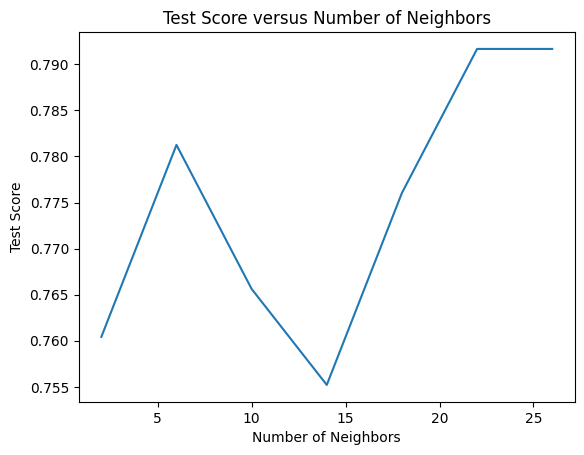

In [7]:
fig, ax = plt.subplots()
ax.plot(list(range(2, 27, 4)), scores)
ax.set_title('Test Score versus Number of Neighbors')
ax.set_xlabel('Number of Neighbors')
ax.set_ylabel('Test Score')
plt.show()